# Анализ поведения пользователей тарифных планов оператора сотовой связи и подготовка предложений по выбору наилучшего тарифного план

## 1 Обзор данных¶

    Проведем обзор данных, изучим общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_users = pd.read_csv('users.csv')
data_calls = pd.read_csv('calls.csv')
data_messages = pd.read_csv('messages.csv')
data_internet = pd.read_csv('internet.csv')
data_tariffs = pd.read_csv('tariffs.csv')
display('Информация о пользователях', data_users)
print(data_users.columns, '\n')
data_users.info()
print()
display('Информация о звонках', data_calls)
print(data_calls.columns, '\n')
data_calls.info()
print()
display('Информация о сообщениях', data_messages)
print(data_messages.columns, '\n')
data_messages.info()
print()
display('Информация об интернет-сессиях', data_internet)
print(data_internet.columns, '\n')
data_internet.info()
print()
display('Информация о тарифах', data_tariffs)
print(data_tariffs.columns, '\n')
data_tariffs.info()

'Информация о пользователях'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



'Информация о звонках'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



'Информация о сообщениях'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Index(['id', 'message_date', 'user_id'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



'Информация об интернет-сессиях'

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB



'Информация о тарифах'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


<font size="4"><b>Выводы</b></font>

Для проведения исследования нам предоставлены 5 таблиц, связанных по идентификационным номерам пользователей ('user_id'). 

Пояснение содержания столбцов каждой таблицы представлено ниже.

    1) Таблица с информацией о пользователях
    
Для проведения работы представлена информация о 500 пользователях. Пропусков в таблице нет, исключение составляет столбец 'churn_date'. Но здесь пропуски допущены специально и несут свой смысл: из 500 пользователей на момент извлечения датасета 38 пользователей прекратили использовать тарифы.

В столбцах 'churn_date' и 'reg_date' в следующем разделе поменяем тип данных (на data).

    2) Таблица с информацией о звонках
    
Пропусков в таблице нет. В столбце 'call_date' в следующем разделе поменяем тип данных (на data).

    3) Таблица с информацией о сообщениях
    
Пропусков в таблице нет. В столбце 'message_date' в следующем разделе поменяем тип данных (на data).

    4) Таблица с информацией об интернет-сессиях
    
Пропусков в таблице нет. В столбце 'session_date' в следующем разделе поменяем тип данных (на data).

Появился лишний столбец 'Unnamed: 0' дублирующий столбец с индексами, удалим его в следующем разделе.

    5) Таблица с информацией о тарифах
    
Пропусков в таблице нет, все столбцы содержат корректные типы данных.

    Можно сказать нам достались практически идеальные данные.

<font size="4"><b>Описание данных</b></font>

    Таблица users (информация о пользователях):

•	user_id — уникальный идентификатор пользователя

•	first_name — имя пользователя

•	last_name — фамилия пользователя

•	age — возраст пользователя (годы)

•	reg_date — дата подключения тарифа (день, месяц, год)

•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

•	city — город проживания пользователя

•	tariff — название тарифного плана

    Таблица calls (информация о звонках):
•	id — уникальный номер звонка

•	call_date — дата звонка

•	duration — длительность звонка в минутах

•	user_id — идентификатор пользователя, сделавшего звонок
    
    Таблица messages (информация о сообщениях):
•	id — уникальный номер сообщения

•	message_date — дата сообщения

•	user_id — идентификатор пользователя, отправившего сообщение
    
    Таблица internet (информация об интернет-сессиях):
•	id — уникальный номер сессии

•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

•	session_date — дата интернет-сессии

•	user_id — идентификатор пользователя

    Таблица tariffs (информация о тарифах):
•	tariff_name — название тарифа

•	rub_monthly_fee — ежемесячная абонентская плата в рублях

•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

•	messages_included — количество сообщений в месяц, включённых в абонентскую плату

•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 2 Подготовка данных¶

### 2.1 Приведем данные к нужным типам, исправим ошибки в данных

    1) Таблица с информацией о пользователях    

In [3]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users.info()
print(data_users['city'].unique(),'\n')
print(data_users['tariff'].unique(),'\n')
print(data_users['age'].unique())

display('Информация о пользователях', data_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 

'Информация о пользователях'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<b>Подготовим таблицу 'data_users_city' (понадобится нам при проверке гипотезы), за основу возьмем таблицу 'data_users'</b> 

In [4]:
# из таблицы 'data_users' удалим ненужные столбцы и получим таблицу 'data_users_city'
data_users_city = copy.deepcopy(data_users)
data_users_city = data_users_city.drop(['age', 'churn_date', 'tariff', 'first_name', 'last_name', 'reg_date'], axis=1)

display(data_users_city)

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


    2) Таблица с информацией о звонках

In [5]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls.info()

display('Информация о звонках', data_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


'Информация о звонках'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


    3) Таблица с информацией о сообщениях

In [6]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

display('Информация о сообщениях', data_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


'Информация о сообщениях'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


    4) Таблица с информацией об интернет-сессиях

In [7]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.pop('Unnamed: 0') # удаляем лишний столбец
data_internet.info()

display('Информация об интернет-сессиях', data_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


'Информация об интернет-сессиях'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<font size="4"><b>Выводы</b></font>

    Выявленные ошибки исправлены,данные приведены к нужным типам.
 
    В столбце 'duration' таблицы с информацией о звонках есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их удалять не будем.

### 2.2 Подготовка пользовательских данных

#### Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут по месяцам

    Создадим в таблице с информацией о звонках новый столбец с месяцами:

In [8]:
data_calls['months'] = data_calls['call_date'].dt.month
display(data_calls)

,id,call_date,duration,user_id,months
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


    Создадим еще один столбец с округленной продолжительностью всех звонков до минут, т.к. по условиям тарифов каждый звонок округляется до минут:

In [9]:
data_calls['duration_minutes'] = np.ceil(data_calls['duration'])
display(data_calls)
print(data_calls['duration_minutes'].unique())
print(data_calls['duration'].max())

,id,call_date,duration,user_id,months,duration_minutes
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.0
202603,1499_216,2018-10-18,18.83,1499,10,19.0
202604,1499_217,2018-11-10,10.81,1499,11,11.0
202605,1499_218,2018-10-06,4.27,1499,10,5.0


[ 0.  3. 14.  6. 19.  8. 10.  5. 13. 16.  9.  2. 15. 11. 24. 12. 23.  7.
 20.  1.  4. 17. 21. 18. 25. 22. 27. 26. 29. 28. 30. 37. 31. 33. 34. 32.
 36. 35. 38.]
38.0


Создан столбец 'duration_minutes', максимальная продолжительность разгворов была 38 минут.

    Посчитаем общее количество сделанных звонков и израсходованных минут каждым клиетом:

In [10]:
data_calls_usergroup = data_calls.groupby('user_id').agg({'duration_minutes': ('count', 'sum')}).reset_index()
display(data_calls_usergroup)

user_id duration_minutes        
                       count     sum
0      1000              368  2566.0
1      1001              122   844.0
2      1002              217  1517.0
3      1003              520  3822.0
4      1004              176   987.0
..      ...              ...     ...
487    1495              565  3920.0
488    1496              828  5984.0
489    1497              201  1406.0
490    1498              180  1293.0
491    1499              220  1623.0

[492 rows x 3 columns]

    Посчитаем количество сделанных звонков и израсходованных минут каждым клиентом за каждый месяц с помощью pivot_table():

In [11]:
data_calls_user_months_group = data_calls.pivot_table(index=['user_id', 'months'], values='duration_minutes', aggfunc=['count', 'sum'])
display(data_calls_user_months_group)

count              sum
               duration_minutes duration_minutes
user_id months                                  
1000    5                    22            159.0
        6                    43            172.0
        7                    47            340.0
        8                    52            408.0
        9                    58            466.0
...                         ...              ...
1498    10                   41            247.0
1499    9                     9             70.0
        10                   68            449.0
        11                   74            612.0
        12                   69            492.0

[3174 rows x 2 columns]

#### Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

    Создадим в таблице с информацией о сообщениях новый столбец с месяцами:

In [12]:
data_messages['months'] = data_messages['message_date'].dt.month
display(data_messages)

,id,message_date,user_id,months
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


    Посчитаем количество отправленных сообщений каждым клиентом за каждый месяц с помощью pivot_table():

In [13]:
data_messages_user_months_group = data_messages.pivot_table(index=['user_id', 'months'], values='id', aggfunc='count')
display(data_messages_user_months_group)

id
user_id months    
1000    5       22
        6       60
        7       75
        8       81
        9       57
...             ..
1498    10      42
1499    9       11
        10      48
        11      59
        12      66

[2717 rows x 1 columns]

#### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

    Создадим в таблице с информацией об интернет-трафике новый столбец с месяцами:

In [14]:
data_internet['months'] = data_internet['session_date'].dt.month
display(data_internet)

,id,mb_used,session_date,user_id,months
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


##### Посчитаем количество интернет-сессий каждого клиента за каждый месяц и объем интернет-трафика каждого клиента за каждый месяц (пока в мб без округлений) с помощью pivot_table():

In [15]:
data_internet_user_months_group = data_internet.pivot_table(index=['user_id', 'months'], values='mb_used', aggfunc=['count', 'sum']).reset_index()
display(data_internet_user_months_group.head(30))
print(len(data_internet_user_months_group))

,user_id,months,count,sum
,,,mb_used,mb_used
0,1000,5,5,2253.49
1,1000,6,49,23233.77
2,1000,7,29,14003.64
3,1000,8,29,14055.93
4,1000,9,27,14568.91
5,1000,10,27,14702.49
6,1000,11,24,14756.47
7,1000,12,21,9817.61
8,1001,11,55,18429.34


3203


In [16]:
# переименуем столбцы в таблице 'data_internet_user_months_group'
data_internet_user_months_group.columns = ['user_id', 'months', 'count_session', 'month_traffic']
display(data_internet_user_months_group)

,user_id,months,count_session,month_traffic
0,1000,5,5,2253.49
1,1000,6,49,23233.77
2,1000,7,29,14003.64
3,1000,8,29,14055.93
4,1000,9,27,14568.91
...,...,...,...,...
3198,1498,10,59,20579.36
3199,1499,9,5,1845.75
3200,1499,10,58,17788.51
3201,1499,11,49,17963.31


In [17]:
# Максимальное значение объема интернет-траффика в месяц составил в мб - 49745.69 мб.
print(data_internet_user_months_group['month_traffic'].max())

49745.69000000001


#####  А теперь посчитаем количество интернет-сессий каждого клиента за каждый месяц и объем интернет-трафика каждого клиента за каждый месяц, но округленные до гигабайта, т.к. по условиям тарифов объем интернет-трафика за каждый месяц округляется до гигабайта:

In [18]:
data_internet_user_months_group['month_traffic_gb'] = np.ceil(data_internet_user_months_group['month_traffic'] / 1024)
display(data_internet_user_months_group)

,user_id,months,count_session,month_traffic,month_traffic_gb
0,1000,5,5,2253.49,3.0
1,1000,6,49,23233.77,23.0
2,1000,7,29,14003.64,14.0
3,1000,8,29,14055.93,14.0
4,1000,9,27,14568.91,15.0
...,...,...,...,...,...
3198,1498,10,59,20579.36,21.0
3199,1499,9,5,1845.75,2.0
3200,1499,10,58,17788.51,18.0
3201,1499,11,49,17963.31,18.0


In [19]:
# Максимальное значение объема интернет-траффика в месяц составил 49 Гб.
print(data_internet_user_months_group['month_traffic_gb'].max())

49.0


Максимальное значение объема интернет-траффика в месяц составил в мб - 49745.69 мб или 48.57 Гб, что составит 49 Гб - округленное значение.

#### Посчитаем выручку с каждого пользователя по месяцам

##### Создадим таблицу в которой соберем количество минут, сообщений и объем интернет-трафика каждого пользователя помесячно

In [20]:
# возьмем за основу таблицу 'data_calls_user_months_group' - расчет количества звонков и суммы минут
data_calls_messages_internet_user_months = copy.deepcopy(data_calls_user_months_group)
display(data_calls_messages_internet_user_months)

count              sum
               duration_minutes duration_minutes
user_id months                                  
1000    5                    22            159.0
        6                    43            172.0
        7                    47            340.0
        8                    52            408.0
        9                    58            466.0
...                         ...              ...
1498    10                   41            247.0
1499    9                     9             70.0
        10                   68            449.0
        11                   74            612.0
        12                   69            492.0

[3174 rows x 2 columns]

In [21]:
# удалим столбец с количеством звонков
data_calls_messages_internet_user_months.pop('count')
display(data_calls_messages_internet_user_months)

sum
               duration_minutes
user_id months                 
1000    5                 159.0
        6                 172.0
        7                 340.0
        8                 408.0
        9                 466.0
...                         ...
1498    10                247.0
1499    9                  70.0
        10                449.0
        11                612.0
        12                492.0

[3174 rows x 1 columns]

In [22]:
# переименуем столбец ['sum']['duration_minutes'] с общим по месячным количеством минут:
# удалим 0-й уровень в названии столбца - останется 'duration_minutes'
data_calls_messages_internet_user_months.columns = data_calls_messages_internet_user_months.columns.droplevel()
# переименуем название 'duration_minutes' в 'minutes'
data_calls_messages_internet_user_months = data_calls_messages_internet_user_months.rename(columns={'duration_minutes': 'minutes'})
display(data_calls_messages_internet_user_months)

minutes
user_id months         
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3174 rows x 1 columns]

In [23]:
# переименуем столбцы в таблице с общим количеством минут (подготовим таблицу для объединения) 
data_calls_messages_internet_user_months = data_calls_messages_internet_user_months.reset_index()
data_calls_messages_internet_user_months.columns = ['user_id', 'months', 'minutes']
display(data_calls_messages_internet_user_months)

,user_id,months,minutes
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


In [24]:
# переименуем столбцы в таблице с общим количеством сообщений (подготовим таблицу для объединения) 
data_messages_user_months_group = data_messages_user_months_group.reset_index()
display(data_messages_user_months_group)

,user_id,months,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [25]:
# объединим 2 таблицы получим таблицу с общим количеством минут и сообщений пользователей по месяцам
data_calls_messages_internet_user_months = pd.merge(data_calls_messages_internet_user_months, data_messages_user_months_group, how='outer', on=['user_id','months'])
display(data_calls_messages_internet_user_months)

,user_id,months,minutes,id
0,1000,5,159.0,22.0
1,1000,6,172.0,60.0
2,1000,7,340.0,75.0
3,1000,8,408.0,81.0
4,1000,9,466.0,57.0
...,...,...,...,...
3208,1489,8,NaN,17.0
3209,1489,9,NaN,32.0
3210,1489,10,NaN,21.0
3211,1489,11,NaN,20.0


In [26]:
# подготовим таблицу с общим объемом интернет трафика пользователей по месяцам к объединению
data_internet_user_months_group = data_internet_user_months_group[['user_id', 'months', 'month_traffic_gb']]
display(data_internet_user_months_group)

,user_id,months,month_traffic_gb
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


In [27]:
# объединим 2 таблицы получим таблицу с общим количеством минут, сообщений и объема Гб пользователей по месяцам
data_calls_messages_internet_user_months = pd.merge(data_calls_messages_internet_user_months, data_internet_user_months_group, how='outer', on=['user_id','months'])
data_calls_messages_internet_user_months.columns = ['user_id', 'months', 'minutes', 'messages', 'internet']
display(data_calls_messages_internet_user_months)

,user_id,months,minutes,messages,internet
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0
3210,1489,10,NaN,21.0,20.0
3211,1489,11,NaN,20.0,18.0
3212,1489,12,NaN,35.0,17.0


<font size="4"><b>Пояснение</b></font>
    
    В столбце 'messages' и 'minutes' у некоторых клиентов попадаются пустые строки, это может говорить о том, что данные клиенты не использовали минуты или сообщений в данном месяце, возможно пользовались только интернетом или только интернетом и сообщениями или ипользовали только минуты и интернет.
    
    Заменим в этих случаях пропуски нулями.

In [28]:
data_calls_messages_internet_user_months = data_calls_messages_internet_user_months.fillna(value=0)
display(data_calls_messages_internet_user_months)

,user_id,months,minutes,messages,internet
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3209,1489,9,0.0,32.0,17.0
3210,1489,10,0.0,21.0,20.0
3211,1489,11,0.0,20.0,18.0
3212,1489,12,0.0,35.0,17.0


<b>Получена таблица 'data_calls_messages_internet_user_months' с количеством минут, сообщений и объем интернет-трафика каждого пользователя помесячно. В данной таблице 3214 строк.</b>

##### Посчитаем общую помесячную выручку каждого клиента и внесем ее в новый столбец 'total_income'. Для этого найдем выручки за минуты, сообщения и объем интернет-трафика, использованные сверх тарифов, а затем просуммируем их прибавив к ним ежемесячную абонентскую плату за соответствующий тариф.

###### 1) Для этого в таблицу 'data_calls_messages_internet_user_months' добавим столбец с тарифами для каждого пользователя с помощью метода merge()

In [29]:
# из таблицы 'data_users' удалим ненужные столбы и получим таблицу 'data_users_tariff'
data_users_tariff = copy.deepcopy(data_users)
data_users_tariff = data_users_tariff.drop(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date'], axis=1)
display(data_users_tariff)
display(data_users) # проверим, что 'data_users' не изменилась

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
...,...,...
495,1495,ultra
496,1496,smart
497,1497,smart
498,1498,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [30]:
# объединим таблицы 'data_calls_messages_internet_user_months'  и 'data_users_tariff' с помощью .merge()
data_calls_messages_internet_user_tariff_months = data_calls_messages_internet_user_months.merge(data_users_tariff, on='user_id')
display(data_calls_messages_internet_user_tariff_months)

,user_id,months,minutes,messages,internet,tariff
0,1000,5,159.0,22.0,3.0,ultra
1,1000,6,172.0,60.0,23.0,ultra
2,1000,7,340.0,75.0,14.0,ultra
3,1000,8,408.0,81.0,14.0,ultra
4,1000,9,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart
3210,1489,9,0.0,32.0,17.0,smart
3211,1489,10,0.0,21.0,20.0,smart
3212,1489,11,0.0,20.0,18.0,smart


<b>Получена таблица 'data_calls_messages_internet_user_tariff_months' с количеством минут, сообщений и объем интернет-трафика каждого пользователя помесячно с указанием тарифа. В данной таблице 3214 строк.</b>

###### 2) Посчитаем помесячную выручку каждого пользователя по минутам, сообщениям и интернет-трафику, а затем внесем эти данные в таблицу 'data_calls_messages_internet_user_tariff_months' создав соответствующие новые столбцы с помесячной выручкой каждого пользователя

<b>Для этого создадим в таблице 'data_calls_messages_internet_user_tariff_months' дополнительные столбцы:</b> 

In [31]:
# сделаем копию таблицы 'data_calls_messages_internet_user_tariff_months' с более коротким названием для удобства
data_income = copy.deepcopy(data_calls_messages_internet_user_tariff_months)

display(data_tariffs)

# переименуем столбец 'tariff' в 'tariff_name' в таблице 'data_income'
data_income = data_income.rename(columns={'tariff': 'tariff_name'})

# с помощью merge() внесем в таблицу 'data_income' дополнительные столбцы из таблицы 'data_tariffs' для дальнейших расчетов
data_income = data_income.merge(data_tariffs, on='tariff_name')

display(data_income)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3


In [32]:
# создадим новый столбец 'minute_income' - выручка за минуты, использованные сверх тарифа
data_income['minute_income'] = (data_income['minutes'] - data_income['minutes_included'])*data_income['rub_per_minute']

# создадим новый столбец 'messages_income' - выручка за сообщения, отправленные сверх тарифа
data_income['messages_income'] = (data_income['messages'] - data_income['messages_included'])*data_income['rub_per_message']

# создадим новый столбец 'internet_income' - выручка за интернет-трафик, использованный сверх тарифа
data_income['internet_income'] = (data_income['internet'] - data_income['mb_per_month_included']/1024)*data_income['rub_per_gb']

display(data_income)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-4050.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-1050.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-2400.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-2400.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-2250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,-1500.0,-99.0,-800.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,-1500.0,-54.0,400.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,-1500.0,-87.0,1000.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,-1500.0,-90.0,600.0


<b>Пояснение</b>

В наших новых 3-х столбцах имеются отрицательные значения - говорящие о том, что минуты, сообщения и объем интернет-трафика у указанных клиентов в соответствующих месяцах не превысили значения включенные в тариф, а также говрящие что выручки в таких случаях дополнительной нет (дополнительная выручка появляется только при превышении лимитных значений включенных в тариф). Здесь отрицательные значения просто сигнализируют об отсутствии дополнительной выручки.
    
Поэтому все отрицательные значения в этих тех столбцах можно спокойно обнулить (заменить нулями).

In [33]:
# заменим отрицательные значения на 0
data_income.loc[(data_income.minute_income < 0), 'minute_income'] = 0
data_income.loc[(data_income.messages_income < 0), 'messages_income'] = 0
data_income.loc[(data_income.internet_income < 0), 'internet_income'] = 0

display(data_income)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0


<b>3) Посчитаем общую помесячную выручку каждого клиента и внесем ее в новый столбец 'total_income':</b>

In [34]:
data_income['total_income'] = data_income['minute_income'] + data_income['messages_income'] + data_income['internet_income'] + data_income['rub_monthly_fee']
display(data_income)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0


<b>Построим диаграммы размаха минут, сообщений, объема трафика и общей выручки для сравнения тарифов:</b>

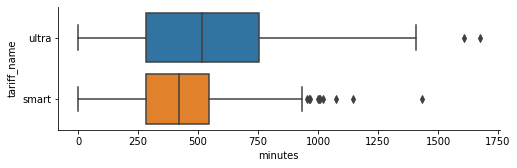

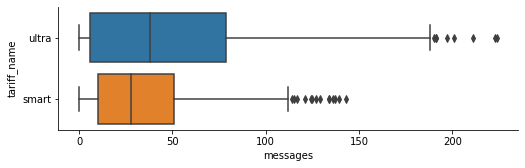

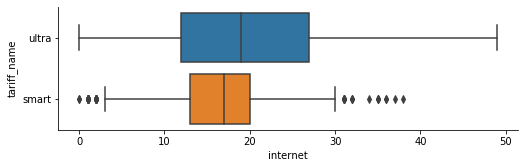

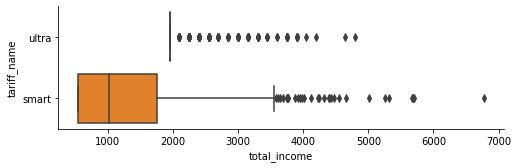

In [35]:
for column in [ 'minutes', 'messages', 'internet', 'total_income']:    
    g = sns.catplot(y='tariff_name', x=column, kind="box", data = data_income, orient='h')
    g.fig.set_figwidth(8)
    g.fig.set_figheight(2)

<font size="4"><b>Выводы</b></font>

    В данном разделе:
- выполнены мероприятия по подготовке данных для дальнейшего анализа:
    - найдены и исправлены ошибки в данных (поиск и удаление по возможности пропусков и других аномалий);
    - данные в столбцах приведены к нужным типам данных;
    
- подготовлены пользовательские данные:
    - получены важные помесячные характеристики для каждого пользователя, такие как количество сделанных звонков, израсходованных минут и отправленных сообщений, объем интернет-трафика;
    - расчитана помесячная выручка с каждого пользователя.
    
    Все эти данные понадобятся для дальнейшего анализа в следующх разделах.

## 3 Анализ данных¶

### 3.1 Проанализируем отток клиентов:

In [36]:
print ('Кол-во клентов покинувших компанию за год', data_users['churn_date'].notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       data_users.query('churn_date > "2018-09-25"')['churn_date'].notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (data_users.query('churn_date > "2018-09-25"')['churn_date'].notna().sum()/data_users['churn_date'].notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
data_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


Отток клиентов увеличелся особенно за последние 4 месяца. Преобладают пользователи тарифв Smart.

### 3.2 Опишем поведение клиентов исходя из тарифа. 

Для этого проанализируем сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Для этого:

###### Разделим пользователей со всеми данными по количеству минут, сообщений и интернет-трафика на две выборки - по 2-м тарифам. Использовать для анализа данных в данном разделе будем таблицу 'data_calls_messages_internet_user_tariff_months'.

In [37]:
display(data_calls_messages_internet_user_tariff_months)

,user_id,months,minutes,messages,internet,tariff
0,1000,5,159.0,22.0,3.0,ultra
1,1000,6,172.0,60.0,23.0,ultra
2,1000,7,340.0,75.0,14.0,ultra
3,1000,8,408.0,81.0,14.0,ultra
4,1000,9,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart
3210,1489,9,0.0,32.0,17.0,smart
3211,1489,10,0.0,21.0,20.0,smart
3212,1489,11,0.0,20.0,18.0,smart


In [38]:
# с помощью фильтрации создадим срез (выборку) пользователей, использующих тариф Smart
data_users_smart = data_calls_messages_internet_user_tariff_months[data_calls_messages_internet_user_tariff_months['tariff'] == 'smart']
display(data_users_smart)

,user_id,months,minutes,messages,internet,tariff
8,1001,11,430.0,0.0,18.0,smart
9,1001,12,414.0,0.0,14.0,smart
10,1002,6,117.0,4.0,11.0,smart
11,1002,7,214.0,11.0,18.0,smart
12,1002,8,289.0,13.0,20.0,smart
...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart
3210,1489,9,0.0,32.0,17.0,smart
3211,1489,10,0.0,21.0,20.0,smart
3212,1489,11,0.0,20.0,18.0,smart


In [39]:
# с помощью query() создадим срез (выборку) пользователей, использующих тариф Ultra
data_users_ultra = data_calls_messages_internet_user_tariff_months.query('tariff == "ultra"')
display(data_users_ultra)

,user_id,months,minutes,messages,internet,tariff
0,1000,5,159.0,22.0,3.0,ultra
1,1000,6,172.0,60.0,23.0,ultra
2,1000,7,340.0,75.0,14.0,ultra
3,1000,8,408.0,81.0,14.0,ultra
4,1000,9,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...
3204,1473,8,0.0,17.0,13.0,ultra
3205,1473,9,0.0,19.0,17.0,ultra
3206,1473,10,0.0,20.0,14.0,ultra
3207,1473,11,0.0,14.0,22.0,ultra


###### Проведем анализ данных по клиентам, использующим тариф Smart (таблица 'data_users_smart')

In [40]:
# обновим индексы после разделения таблицы data_calls_messages_internet_user_tariff_months (drop=True - позволяет не создавать столбец со старыми индексами)
data_users_smart = data_users_smart.reset_index(drop=True)
display(data_users_smart)

,user_id,months,minutes,messages,internet,tariff
0,1001,11,430.0,0.0,18.0,smart
1,1001,12,414.0,0.0,14.0,smart
2,1002,6,117.0,4.0,11.0,smart
3,1002,7,214.0,11.0,18.0,smart
4,1002,8,289.0,13.0,20.0,smart
...,...,...,...,...,...,...
2224,1489,8,0.0,17.0,11.0,smart
2225,1489,9,0.0,32.0,17.0,smart
2226,1489,10,0.0,21.0,20.0,smart
2227,1489,11,0.0,20.0,18.0,smart


###### Проанализируем распределение частот израсходованных минут, сообщений и объема интернет-трафика для всех пользователей тарифа Smart в начале (в январе), середине (в июле) и конце (в декабре) года

##### Подготовим 3 таблицы для января, июля и декабря

In [41]:
# создадим выборку пользователей, использующих Smart за январь месяц
data_users_smart_01month = data_users_smart.query('months == 1').reset_index(drop=True)
display(data_users_smart_01month)

,user_id,months,minutes,messages,internet,tariff
0,1005,1,95.0,7.0,3.0,smart
1,1032,1,380.0,38.0,24.0,smart
2,1045,1,9.0,5.0,3.0,smart
3,1055,1,551.0,30.0,17.0,smart
4,1071,1,194.0,16.0,16.0,smart
5,1113,1,110.0,14.0,1.0,smart
6,1134,1,332.0,32.0,10.0,smart
7,1135,1,90.0,1.0,2.0,smart
8,1155,1,337.0,48.0,20.0,smart
9,1176,1,187.0,20.0,7.0,smart


In [42]:
# создадим выборку пользователей, использующих Smart за июль месяц
data_users_smart_07month = data_users_smart.query('months == 7').reset_index(drop=True)
display(data_users_smart_07month)

,user_id,months,minutes,messages,internet,tariff
0,1002,7,214.0,11.0,18.0,smart
1,1005,7,569.0,56.0,8.0,smart
2,1006,7,316.0,0.0,20.0,smart
3,1007,7,577.0,26.0,16.0,smart
4,1009,7,183.0,14.0,25.0,smart
...,...,...,...,...,...,...
196,1483,7,686.0,47.0,14.0,smart
197,1490,7,250.0,62.0,11.0,smart
198,1492,7,517.0,19.0,15.0,smart
199,1496,7,582.0,42.0,24.0,smart


In [43]:
# создадим выборку пользователей, использующих Smart за декабрь месяц
data_users_smart_12month = data_users_smart.query('months == 12').reset_index(drop=True)
display(data_users_smart_12month)

,user_id,months,minutes,messages,internet,tariff
0,1001,12,414.0,0.0,14.0,smart
1,1002,12,236.0,12.0,18.0,smart
2,1005,12,592.0,54.0,9.0,smart
3,1006,12,379.0,0.0,19.0,smart
4,1007,12,421.0,26.0,13.0,smart
...,...,...,...,...,...,...
332,1494,12,418.0,0.0,18.0,smart
333,1496,12,518.0,51.0,21.0,smart
334,1497,12,545.0,17.0,20.0,smart
335,1499,12,492.0,66.0,13.0,smart


<b>Предыдущие 3 таблицы показали, что с начала года к концу года число пользователей тарифа Smart значительно увеличилось: в январе - 34 пользователя, в июле - 201 пользователь, в декабре - уже 337 пользователей.</b>

##### Сравним гистограммы  частот израсходованных минут для тарифа Smart в начале (в январе), середине (в июле) и конце (в декабре) года

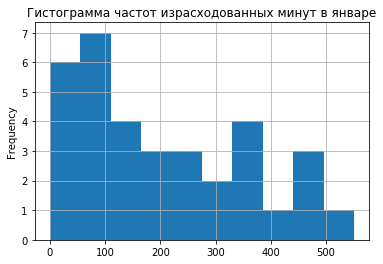

In [44]:
data_users_smart_01month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в январе')
plt.show()

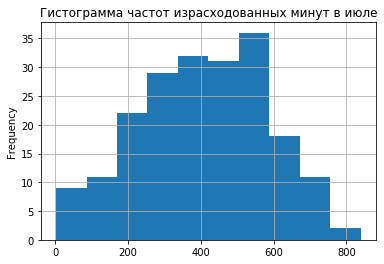

In [45]:
data_users_smart_07month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в июле')
plt.show()

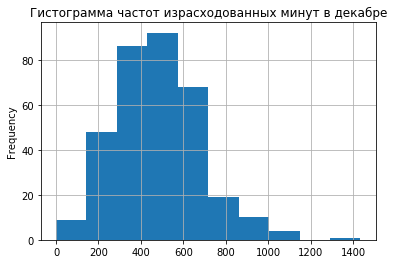

In [46]:
data_users_smart_12month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот израсходованных минут можно сказать в начале года пока пользователей тарифа Smart немного чаще преобладают небольшие значения израсходованных минут. В середине года количество минут существенно увеличивается. В конце года распределение минут похожее на распределение в середине года, но частота всех значений минут гораздо выше.

К концу года с увеличением количества пользователей и соответственно увеличения минут распределение минут все больше  стремится к нормальному распределению.

##### Сравним гистограммы  частот отправленных сообщений для тарифа Smart в начале (в январе), середине (в июле) и конце (в декабре) года

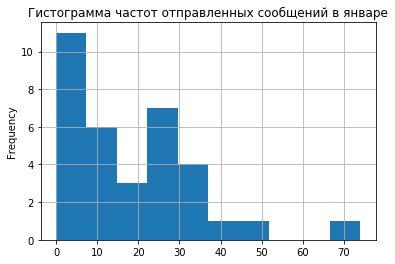

In [47]:
data_users_smart_01month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в январе')
plt.show()

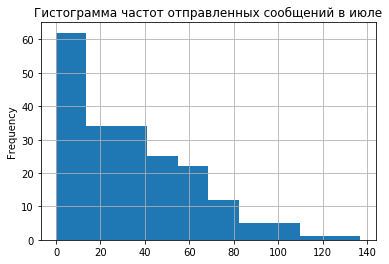

In [48]:
data_users_smart_07month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в июле')
plt.show()

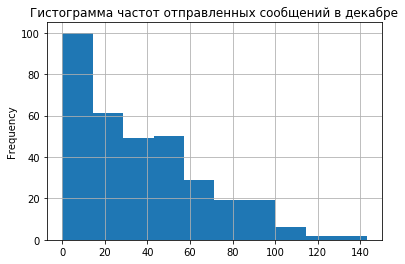

In [49]:
data_users_smart_12month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот отправленных сообщений можно сказать в начале года пока пользователей тарифа Smart немного чаще преобладают небольшие значения отправленных сообщений. В середине года количество сообщений увеличивается. В конце года распределение сообщений похожее на распределение в середине года, но частота всех значений сообщений выше, т.к. прежде всего увеличилось количество пользователей.

К концу года с увеличением количества пользователей и соответственно увеличения количества сообщений распределение все более равномерно снижается.

##### Сравним гистограммы  частот использованного объема интернет-трафика для тарифа Smart в начале (в январе), середине (в июле) и конце (в декабре) года

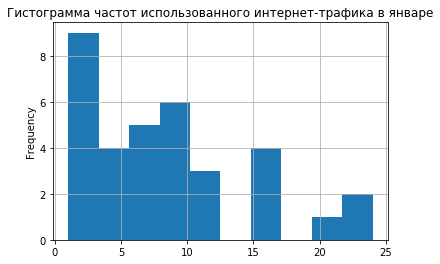

In [50]:
data_users_smart_01month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в январе')
plt.show()

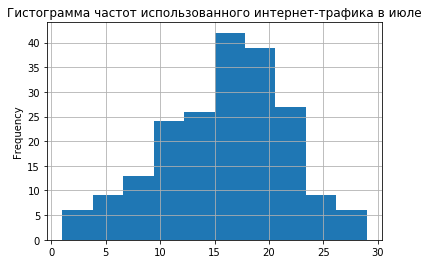

In [51]:
data_users_smart_07month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в июле')
plt.show()

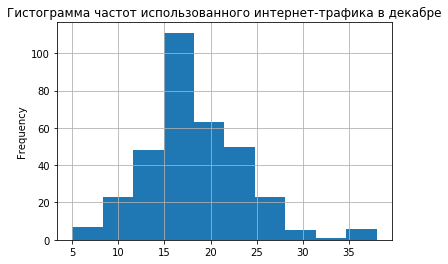

In [52]:
data_users_smart_12month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот объема интернет-трафика можно сказать в начале года пока пользователей тарифа Smart немного, чаще преобладают небольшие значения трафика. В середине года частота боее высоких заченй трафика  сравннии с январем существенно увеличивается (особенно в районе 15-21 Гб). В конце года распределение интерент-трафика более приближено к нормально, частота всех значений объема Гб гораздо выше.

К концу года с увеличением количества пользователей и соответственно увеличения Гб распределение объема трафика все больше стремится к нормальному распределению.

#### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных минут, сообщений и интернет-трафика по месяцам пользователями пользователями тарифа Smart

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных минут пользователями тарифа Smart по месяцам, а также найдем максимальное значение выговоренных минут и построим диаграмму распределения израсходованных минут всех пользователей тарифа Smart

,minutes
months,
1,203.852941
2,298.689655
3,390.051948
4,367.133929
5,387.361702
6,395.640244
7,408.353234
8,421.468085
9,428.611538


          minutes
count   12.000000
mean   386.760499
std     72.262004
min    203.852941
25%    382.304759
50%    401.996739
75%    426.754925
max    478.560831 

Дисперсия: 4786.647452051491 

Стандартное отклонение: 69.18560147929257


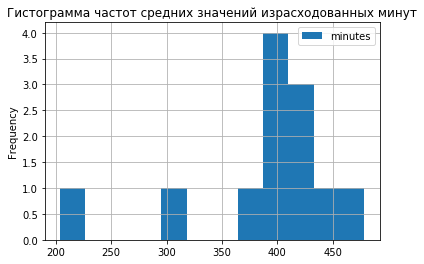

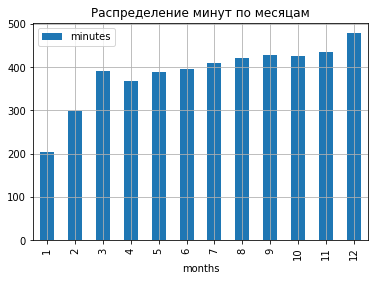

In [53]:
# создадим сводную таблицу средних значений израсходованных минут по месяцам
smart_minutes_months = data_users_smart.pivot_table(index = 'months', values = 'minutes')
display(smart_minutes_months)
smart_minutes_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений израсходованных минут')
smart_minutes_months.plot(y='minutes', kind='bar', grid=True, title='Распределение минут по месяцам')
print(smart_minutes_months.describe(), '\n')
varience = np.var(smart_minutes_months['minutes'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(smart_minutes_months['minutes'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значение среднего и медианы близки друг другу (38.7 и 401.9 соответственно). Стандартное отклонение равно 69.18, а дисперсия - 4786.64.

По гистограмме распределения частот видно, что чаще всего количество израсходованных минут на тарифе Smart составляет примерно 390-410 минут.

На графике распределения средних значений израсходованных минут по месяцам видно постепенное увеличение количества минут с января по декабрь. Это может показывать естественный процесс возрастания количества звонков и соответственно израсходованных минут, т.к. количество новых контактов у людей постоянно растет и таким образом уровень общения по телефону растет год от года (т.е. люди все больше и больше общаются по телефону).

Минимальное количество использованных минут на тарифе Smart: 0.0
Максимальное количество использованных минут на тарифе Smart: 1435.0


,user_id,months,minutes,messages,internet,tariff
11,1005,3,606.0,56.0,11.0,smart
12,1005,4,712.0,41.0,10.0,smart
13,1005,5,595.0,42.0,8.0,smart
14,1005,6,612.0,47.0,10.0,smart
15,1005,7,569.0,56.0,8.0,smart
...,...,...,...,...,...,...
2208,1496,8,527.0,41.0,23.0,smart
2211,1496,11,662.0,46.0,25.0,smart
2212,1496,12,518.0,51.0,21.0,smart
2215,1497,12,545.0,17.0,20.0,smart


Процент превышений использованных минут сверх 500 минут: 0.3382682817406909


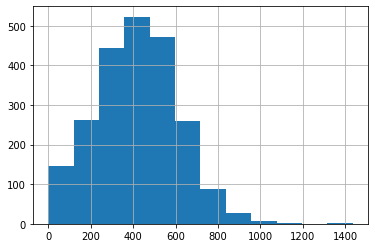

In [54]:
print('Минимальное количество использованных минут на тарифе Smart:', data_users_smart['minutes'].min())
print('Максимальное количество использованных минут на тарифе Smart:', data_users_smart['minutes'].max())
#найдем всех пользователей которые использовали более 500 минут в месяц
display(data_users_smart.query('minutes > 500'))
data_users_smart['minutes'].hist(bins = 12)
print('Процент превышений использованных минут сверх 500 минут:', len(data_users_smart.query('minutes > 500')) / len(data_users_smart))

<b>Вывод</b>

В 2018 году пользователи тарифа Smart в среднем использовали пчти 387 минут в месяц для разговоров. Вместе с тем, часто пользователи выходили за рамки включенных в условия тарифа 500 минут (почти 34 %), при этом чаще всего выход за рамки был на уровне 500-600 минут. Были и те кто выговаривал в месяц гораздо больше (максимально - 1435 минут), чем включено в условия тарифа - 500 минут.

Данная гистограмма распределения частот (без расчета средних значений) подтвердает, что чаще всего количество израсходованных минут на тарифе Smart составляет примерно 380-490 минут. 

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных сообщений пользователями по месяцам, а также найдем максимальное значение отправленных сообщений и построим диаграмму распределения отправленных сообщений всех пользователей тарифа Smart

,messages
months,
1,18.235294
2,24.086207
3,31.857143
4,30.741071
5,33.773050
6,33.402439
7,33.751244
8,33.638298
9,33.638462


        messages
count  12.000000
mean   31.413211
std     5.103413
min    18.235294
25%    31.578125
50%    33.638380
75%    33.767242
max    35.994065 

Дисперсия: 23.874424834598063 

Стандартное отклонение: 4.886146215024481


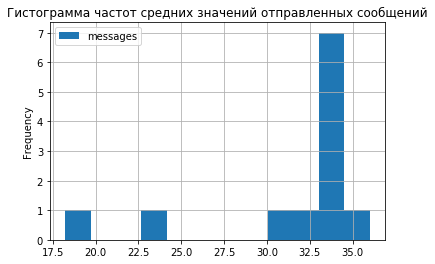

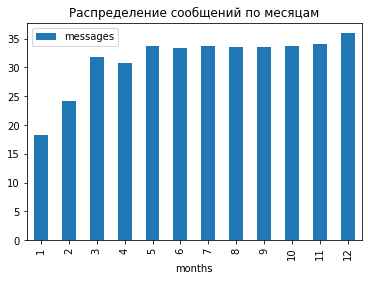

In [55]:
# создадим сводную таблицу средних значений использованных сообщений по месяцам
smart_messages_months = data_users_smart.pivot_table(index = 'months', values = 'messages')
display(smart_messages_months)
#smart_messages_months['messages'].hist(bins = 12)
smart_messages_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений отправленных сообщений')
smart_messages_months.plot(y='messages', kind='bar', title='Распределение сообщений по месяцам')
print(smart_messages_months.describe(), '\n')
varience = np.var(smart_messages_months['messages'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(smart_messages_months['messages'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значение среднего и медианы близки друг другу (31.4 и 33.6 соответственно). Стандартное отклонение равно 4.88, а дисперсия - 23.87.
   
По гистограмме распределения частот видно, что чаще всего количество сообщений на тарифе Smart составляет примерно 33-34 сообщения в месяц.

На графике распределения средних значений израсходованных сообщений по месяцам видно резкое увеличение количества сообщений с января по май, затем ситуация выровнялась и к концу года вновь количество сообщений начало расти. Первоначальный резкий рост среднего количества сообщений может быть вызван увеличением количества клиентов и кроме того, возможно показывает естественный процесс увеличения количества сообщений.

Минимальное количество отправленных сообщений на тарифе Smart: 0.0
Максимальное количество отправленных сообщений на тарифе Smart: 143.0


,user_id,months,minutes,messages,internet,tariff
11,1005,3,606.0,56.0,11.0,smart
15,1005,7,569.0,56.0,8.0,smart
16,1005,8,619.0,64.0,8.0,smart
17,1005,9,479.0,52.0,7.0,smart
19,1005,11,547.0,51.0,13.0,smart
...,...,...,...,...,...,...
2183,1490,7,250.0,62.0,11.0,smart
2212,1496,12,518.0,51.0,21.0,smart
2217,1498,8,400.0,62.0,24.0,smart
2222,1499,11,612.0,59.0,18.0,smart


Процент превышений отправленных сообщений сверх 50 сообщений: 0.253028263795424


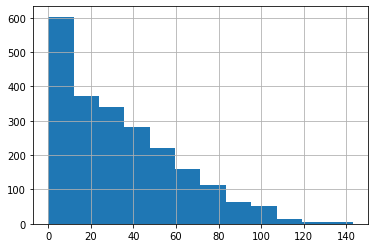

In [56]:
print('Минимальное количество отправленных сообщений на тарифе Smart:', data_users_smart['messages'].min())
print('Максимальное количество отправленных сообщений на тарифе Smart:', data_users_smart['messages'].max())
#найдем всех пользователей, которые отправили более 50 сообщений в месяц
display(data_users_smart.query('messages > 50'))
data_users_smart['messages'].hist(bins = 12)
print('Процент превышений отправленных сообщений сверх 50 сообщений:', len(data_users_smart.query('messages > 50')) / len(data_users_smart))

<b>Вывод</b>

В 2018 году пользователи тарифа Smart в среднем отправили почти 32 сообщения в месяц. Вместе с тем, часто пользователи выходили за рамки включенных в условия тарифа 50 сообщений (25 %), при этом чаще всего выход за рамки был на уровне 55-60 сообщений (близкий к порогу - 50 сообщений). Были и те кто отправил в месяц гораздо больше (максимально - 143 сообщения), чем включено в условия тарифа - 50 сообщений.

Кроме того, данная гистограмма распределения частот (без расчета средних значений) показывает что чаще всего объем отправленных сообщений СМС равен 0. Это может говорить о том, что возмжно люди предпочитаю другие месенджеры для отправки сообщений, такие как Телеграмм, Ватцап и т.п. 

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений интернет-трафика пользователей тарифа Smart по месяцам, а также найдем максимальное значение интернет-трафика и построим диаграмму распределения объема интернет-трафика всех пользователей тарифа Smart

,internet
months,
1,8.735294
2,11.844828
3,15.233766
4,13.625000
5,15.907801
6,15.951220
7,15.875622
8,16.736170
9,16.392308


        internet
count  12.000000
mean   15.198728
std     2.626973
min     8.735294
25%    14.831575
50%    15.929510
75%    16.772366
max    18.201780 

Дисперсия: 6.325902624656703 

Стандартное отклонение: 2.515134713023679


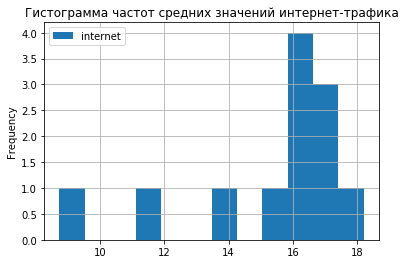

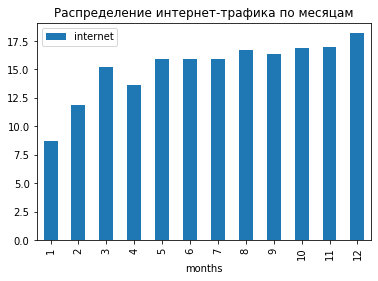

In [57]:
# создадим сводную таблицу средних значений интернет-трафика пользователей по месяцам
smart_internet_months = data_users_smart.pivot_table(index = 'months', values = 'internet')
display(smart_internet_months)
#smart_internet_months['internet'].hist(bins = 12)
smart_internet_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений интернет-трафика')
smart_internet_months.plot(y='internet', kind='bar', title='Распределение интернет-трафика по месяцам')
print(smart_internet_months.describe(), '\n')
varience = np.var(smart_internet_months['internet'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(smart_internet_months['internet'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значение среднего и медианы почти совпадают (15.19 и 15.92 соответственно). Стандартное отклонение равно 2.51, а дисперсия - 6.32.

По гистограмме распределения частот видно, что чаще всего объем интернет-трафика на тарифе Smart составляет примерно 16-16.5 Гб.

Поведение графика схоже с поведением графика распределения частот отправленных сообщений. На графике распределения средних значений итернет-трафика по месяцам видно резкое увеличение количества Гб с января по май, затем ситуация выровнялась и к концу года вновь количество Гб начало расти.

Минимальный объем интернет-трафика на тарифе Smart: 0.0
Максимальное объем интернет-трафика на тарифе Smart: 38.0


,user_id,months,minutes,messages,internet,tariff
0,1001,11,430.0,0.0,18.0,smart
3,1002,7,214.0,11.0,18.0,smart
4,1002,8,289.0,13.0,20.0,smart
5,1002,9,206.0,4.0,17.0,smart
7,1002,11,243.0,16.0,19.0,smart
...,...,...,...,...,...,...
2222,1499,11,612.0,59.0,18.0,smart
2225,1489,9,0.0,32.0,17.0,smart
2226,1489,10,0.0,21.0,20.0,smart
2227,1489,11,0.0,20.0,18.0,smart


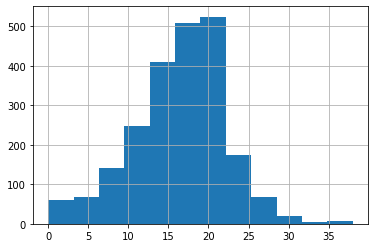

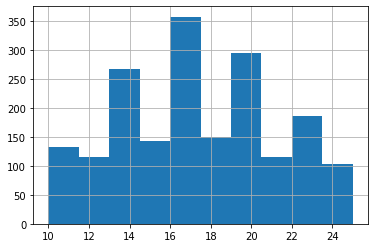

Процент превышений использованного трафика сверх 15 Гб: 0.5850157021085689


In [58]:
print('Минимальный объем интернет-трафика на тарифе Smart:', data_users_smart['internet'].min())
print('Максимальное объем интернет-трафика на тарифе Smart:', data_users_smart['internet'].max())
#найдем всех пользователей, которые использовали более 15Гб в месяц
display(data_users_smart.query('internet > 15'))
data_users_smart['internet'].hist(bins = 12)
plt.show()
data_users_smart['internet'].hist(range=(10, 25))
plt.show()
print('Процент превышений использованного трафика сверх 15 Гб:', len(data_users_smart.query('internet > 15')) / len(data_users_smart))

<b>Вывод</b>

В 2018 году пользователи тарифа Smart в среднем использовали примерно 15 Гб интернет-трафика в месяц. Вместе с тем, часто пользователи выходили за рамки включенных в условия тарифа 15 Гб трафика (почти 58 %), при этом чаще всего выход за рамки был на уровне 19-22  Гб (и вообще чаще всего объем использованного интернет-трафика попадал в эти же рамки). Были и те кто использовал в месяц гораздо больше (максимально - 38 Гб), чем включено в условия тарифа - 15 Гб. Возможно тем кто часто превышает объем трафика хотя бы на 10 Гб в месяц стоит задуматься о переходе на тариф Ultra.

Кроме того, распределение на гистограмме частот объема трафика получилось близким к нормальному. 

###### Проведем анализ данных по клиентам, использующим тариф Ultra (таблица 'data_users_ultra')

In [59]:
# обновим индексы после разделения таблицы data_calls_messages_internet_user_tariff_months (drop=True - позволяет не создавать столбец со старыми индексами)
data_users_ultra = data_users_ultra.reset_index(drop=True)
display(data_users_ultra)

,user_id,months,minutes,messages,internet,tariff
0,1000,5,159.0,22.0,3.0,ultra
1,1000,6,172.0,60.0,23.0,ultra
2,1000,7,340.0,75.0,14.0,ultra
3,1000,8,408.0,81.0,14.0,ultra
4,1000,9,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...
980,1473,8,0.0,17.0,13.0,ultra
981,1473,9,0.0,19.0,17.0,ultra
982,1473,10,0.0,20.0,14.0,ultra
983,1473,11,0.0,14.0,22.0,ultra


#### Проанализируем распределение частот израсходованных минут, сообщений и объема интернет-трафика для тарифа Ultra в начале (в январе), середине (в июле) и конце (в декабре) года

##### Подготовим 3 таблицы для января, июля и декабря

In [60]:
# создадим выборку пользователей, использующих Ultra за январь месяц
data_users_ultra_01month = data_users_ultra.query('months == 1').reset_index(drop=True)
display(data_users_ultra_01month)

,user_id,months,minutes,messages,internet,tariff
0,1120,1,55.0,0.0,1.0,ultra
1,1126,1,272.0,4.0,16.0,ultra
2,1168,1,277.0,14.0,8.0,ultra
3,1254,1,466.0,0.0,20.0,ultra
4,1375,1,852.0,75.0,15.0,ultra
5,1381,1,382.0,32.0,15.0,ultra
6,1385,1,270.0,72.0,19.0,ultra
7,1396,1,418.0,57.0,6.0,ultra
8,1453,1,861.0,50.0,19.0,ultra


In [61]:
# создадим выборку пользователей, использующих Ultra за июль месяц
data_users_ultra_07month = data_users_ultra.query('months == 7').reset_index(drop=True)
display(data_users_ultra_07month)

,user_id,months,minutes,messages,internet,tariff
0,1000,7,340.0,75.0,14.0,ultra
1,1004,7,135.0,181.0,22.0,ultra
2,1018,7,760.0,25.0,7.0,ultra
3,1019,7,453.0,16.0,18.0,ultra
4,1021,7,1197.0,103.0,20.0,ultra
...,...,...,...,...,...,...
86,1476,7,492.0,3.0,16.0,ultra
87,1491,7,606.0,58.0,21.0,ultra
88,1091,7,0.0,35.0,17.0,ultra
89,1106,7,0.0,24.0,22.0,ultra


In [62]:
# создадим выборку пользователей, использующих Ultra за декабрь месяц
data_users_ultra_12month = data_users_ultra.query('months == 12').reset_index(drop=True)
display(data_users_ultra_12month)

,user_id,months,minutes,messages,internet,tariff
0,1000,12,333.0,70.0,10.0,ultra
1,1003,12,802.0,75.0,10.0,ultra
2,1004,12,130.0,162.0,18.0,ultra
3,1013,12,567.0,25.0,21.0,ultra
4,1016,12,94.0,103.0,19.0,ultra
...,...,...,...,...,...,...
134,1091,12,0.0,42.0,13.0,ultra
135,1106,12,0.0,24.0,19.0,ultra
136,1231,12,0.0,191.0,32.0,ultra
137,1328,12,0.0,7.0,39.0,ultra


<b>Предыдущие 3 таблицы показали, что с начала года к концу года число пользователей тарифа Ultra значительно увеличилось: в январе - всего лишь 9 пользователей, в июле - уже 91 пользователей, в декабре - 139 пользователя.</b>

##### Сравним гистограммы  частот израсходованных минут для тарифа Ultra в начале (в январе), середине (в июле) и конце (в декабре) года

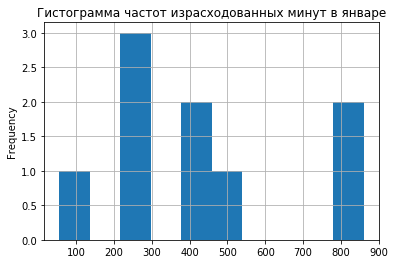

In [63]:
data_users_ultra_01month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в январе')
plt.show()

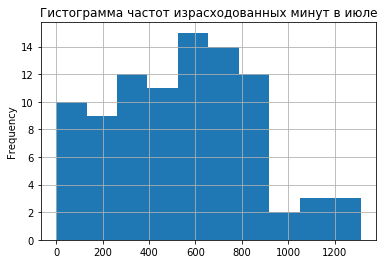

In [64]:
data_users_ultra_07month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в июле')
plt.show()

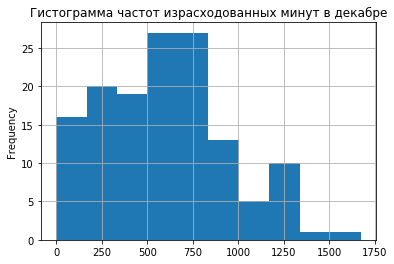

In [65]:
data_users_ultra_12month['minutes'].plot(kind='hist', grid=True, title='Гистограмма частот израсходованных минут в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот израсходованных минут можно сказать в начале года пока пользователей тарифа Ultra немного чаще преобладают небольшие значения израсходованных минут (распределение имеет рваный вид). В середине года количество минут существенно увеличивается, пробелы в значения минут заполняются. К концу года количество израсходованных минут выросли, частота всех значений минут тоже выросла.

##### Сравним гистограммы  частот отправленных сообщений для тарифа Ultra в начале (в январе), середине (в июле) и конце (в декабре) года

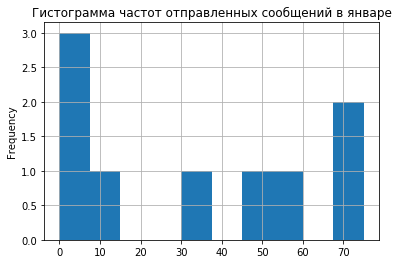

In [66]:
data_users_ultra_01month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в январе')
plt.show()

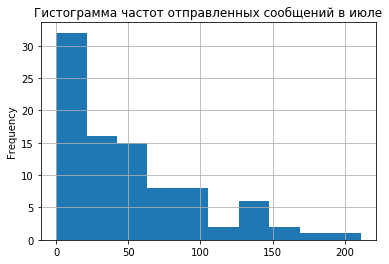

In [67]:
data_users_ultra_07month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в июле')
plt.show()

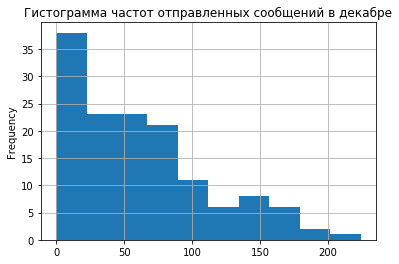

In [68]:
data_users_ultra_12month['messages'].plot(kind='hist', grid=True, title='Гистограмма частот отправленных сообщений в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот отправленных сообщений можно сказать в начале года пока пользователей тарифа Ultra немного, чаще преобладают небольшие значения отправленных сообщений. В середине года количество сообщений увеличивается. В конце года распределение сообщений похожее на распределение в середине года, но частота всех значений сообщений выше, т.к. прежде всего увеличилось количество пользователей.

Больше всего значений отправленных сообщений равно 0, много пользователей видимо не пользуется СМС сообщениями, а использует альтернативные способы с помощью интернета. Аналогичная картина с нулевыми значениями просматривается и на тарифе Smart.

##### Сравним гистограммы  частот использованного объема интернет-трафика для тарифа Ultra в начале (в январе), середине (в июле) и конце (в декабре) года

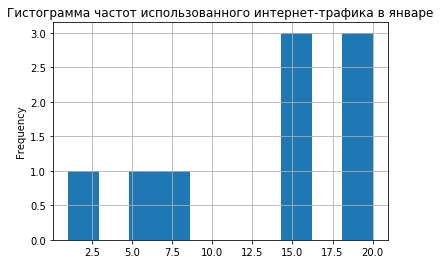

In [69]:
data_users_ultra_01month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в январе')
plt.show()

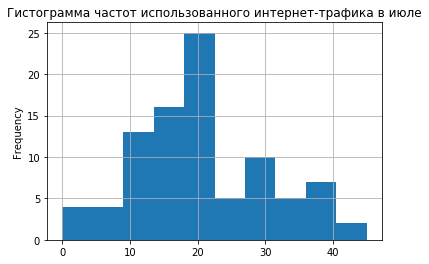

In [70]:
data_users_ultra_07month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в июле')
plt.show()

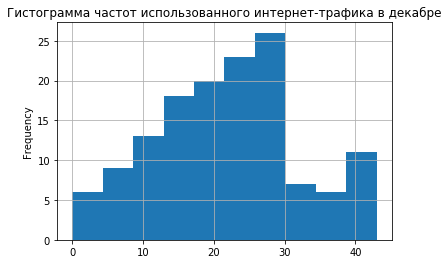

In [71]:
data_users_ultra_12month['internet'].plot(kind='hist', grid=True, title='Гистограмма частот использованного интернет-трафика в декабре')
plt.show()

<b>Вывод</b>

Проанализировав гистограммы частот объема интернет-трафика можно сказать в начале года пока пользователей тарифа Ultra немного, чаще преобладают небольшие значения трафика. В середине года количество Гб увеличивается, при этом наибольшая частота осталась назначении 20 Гб. В конце года на гистограмме видим, что частота значений объема Гб постепено растет до 30 ГБ. Частота использования интернета свыше объема 30 Гб резко падает, видимо большинство пользователей стараются не выходить за рамки предоставленного объема, при том использовать его полностью.

#### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных минут, сообщений и интернет-трафика по месяцам пользователями пользователями тарифа Ultra

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных минут пользователями тарифа Ultra по месяцам, а также найдем максимальное значение выговоренных минут и построим диаграмму распределения израсходованных минут всех пользователей тарифа Ultra

,minutes
months,
1,428.111111
2,297.125000
3,489.648649
4,458.018182
5,510.328358
6,479.702381
7,545.791209
8,510.775701
9,539.443478


          minutes
count   12.000000
mean   495.934310
std     77.450072
min    297.125000
25%    474.281331
50%    510.552030
75%    542.483250
max    592.805755 

Дисперсия: 5498.637489823082 

Стандартное отклонение: 74.1527982602348


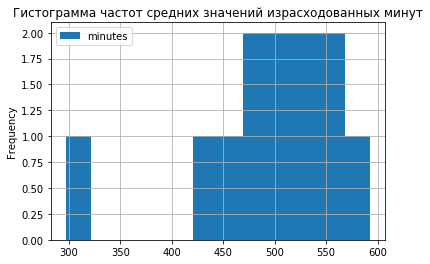

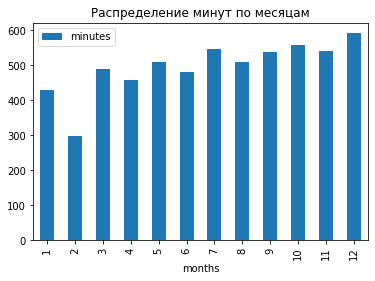

In [72]:
# создадим сводную таблицу средних значений израсходованных минут по месяцам
ultra_minutes_months = data_users_ultra.pivot_table(index = 'months', values = 'minutes')
display(ultra_minutes_months)
ultra_minutes_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений израсходованных минут')
ultra_minutes_months.plot(y='minutes', kind='bar', title='Распределение минут по месяцам')
print(ultra_minutes_months.describe(), '\n')
varience = np.var(ultra_minutes_months['minutes'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(ultra_minutes_months['minutes'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значение среднего и медианы близки друг другу (495 и 510 соответственно). Стандартное отклонение равно 74.15, а дисперсия - 5498.63.

По гистограмме распределения частот видно, что чаще всего количество израсходованных минут на тарифе Ultra составляет примерно 470-570 минут.

На графике распределения средних значений израсходованных минут по месяцам видно постепенное увеличение количества минут с января по декабрь, за искючением февраля. Это может показывать естественный процесс возрастания количества звонков и соответственно израсходованных минут, т.к. количество новых контактов у людей постоянно растет и таким образом уровень общения по телефону растет год от года (т.е. люди все больше и больше общаются по телефону).

Минимальное количество использованных минут на тарифе Ultra: 0.0
Максимальное количество использованных минут на тарифе Ultra: 1673.0


,user_id,months,minutes,messages,internet,tariff


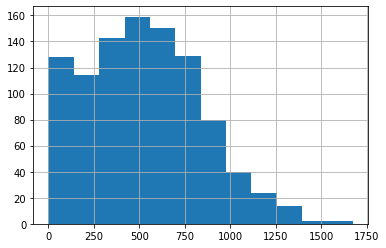

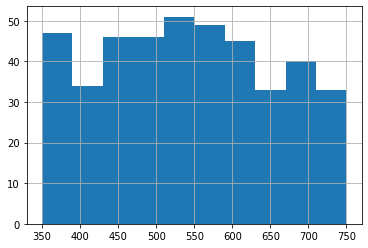

Процент превышений использованных минут сверх 3000 минут: 0.0


In [73]:
print('Минимальное количество использованных минут на тарифе Ultra:', data_users_ultra['minutes'].min())
print('Максимальное количество использованных минут на тарифе Ultra:', data_users_ultra['minutes'].max())
#найдем всех пользователей которые использовали более 3000 минут в месяц
display(data_users_ultra.query('minutes > 3000'))
data_users_ultra['minutes'].hist(bins = 12)
plt.show()
data_users_ultra['minutes'].hist(range=(350, 750))
plt.show()
print('Процент превышений использованных минут сверх 3000 минут:', len(data_users_ultra.query('minutes > 3000')) / len(data_users_ultra))

<b>Вывод</b>

В 2018 году пользователи тарифа Ultra в среднем использовали 495 минут в месяц для разговоров. Вместе с тем, за рамки включенных в условия тарифа 3000 минут не вышел никто. При этом чаще всего выговаривали примерно от 480 до 700 минут. Были и те кто выговаривал в месяц до 1673-х минут.

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений израсходованных сообщений пользователями тарифа Ultra по месяцам, а также найдем максимальное значение отправленных сообщений и построим диаграмму распределения отправленных сообщений всех пользователей тарифа Ultra

,messages
months,
1,33.777778
2,21.958333
3,32.297297
4,31.563636
5,37.850746
6,41.726190
7,49.846154
8,48.439252
9,52.286957


        messages
count  12.000000
mean   43.714983
std    12.320470
min    21.958333
25%    33.407658
50%    45.082721
75%    53.162979
max    60.611511 

Дисперсия: 139.14448868471572 

Стандартное отклонение: 11.79595221610853


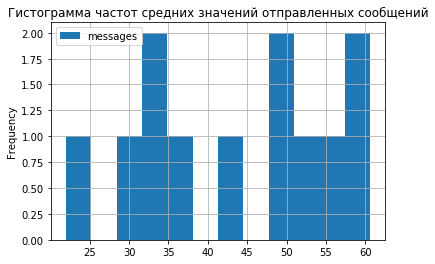

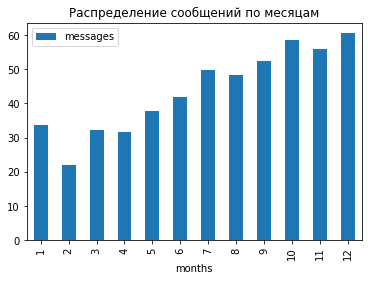

In [74]:
# создадим сводную таблицу средних значений использованных сообщений по месяцам
ultra_messages_months = data_users_ultra.pivot_table(index = 'months', values = 'messages')
display(ultra_messages_months)
ultra_messages_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений отправленных сообщений')
ultra_messages_months.plot(y='messages', kind='bar', title='Распределение сообщений по месяцам')
print(ultra_messages_months.describe(), '\n')
varience = np.var(ultra_messages_months['messages'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(ultra_messages_months['messages'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значение среднего и медианы близки друг другу (43.71 и 45.08 соответственно). Стандартное отклонение равно 11.79, а дисперсия - 139.14.

На графике распределения средних значений израсходованных сообщений по месяцам видно постояное увеличение количества минут в течение года кроме января. Рост среднего количества сообщений может быть вызван увеличением количества клиентов и кроме того, возможно показывает естественный процесс увеличения количества сообщений.

Минимальное количество отправленных сообщений на тарифе Ultra: 0.0
Максимальное количество отправленных сообщений на тарифе Ultra: 224.0


,user_id,months,minutes,messages,internet,tariff


Процент превышений отправленных сообщений сверх 1000 сообщений: 0.0


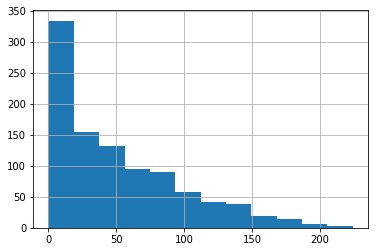

In [75]:
print('Минимальное количество отправленных сообщений на тарифе Ultra:', data_users_ultra['messages'].min())
print('Максимальное количество отправленных сообщений на тарифе Ultra:', data_users_ultra['messages'].max())
#найдем всех пользователей, которые отправили более 1000 сообщений в месяц
display(data_users_ultra.query('messages > 1000'))
data_users_ultra['messages'].hist(bins = 12)
print('Процент превышений отправленных сообщений сверх 1000 сообщений:', len(data_users_ultra.query('messages > 1000')) / len(data_users_ultra))

<b>Вывод</b>

В 2018 году пользователи тарифа Ultra в среднем отправили около 43 сообщений в месяц. Вместе с тем, за рамки включенных в условия тарифа 1000 сообщений не вышел никто. При этом чаще всего количество сообщений составляло примерно до 20-30 сообщений. Были и те кто отправлял в месяц до 224 сообщений.

Кроме того, данная гистограмма распределения частот (без расчета средних значений) показывает что чаще всего объем отправленных сообщений СМС равен 0 (более чем в два раза чаще самого частого аоказателя отправки сообщений). Это может говорить о том, что люди предпочитаю другие месенджеры для отправки сообщений, такие как Телеграмм, Ватцап и другие, тем более что объем вложенного в тариф трафика достаточно большой. 

##### Посчитаем среднее количество, дисперсию и стандартное отклонение для средних значений интернет-трафика пользователей тарифа Ultra по месяцам, а также найдем максимальное значение интернет-трафика и построим диаграмму распределения объема интернет-трафика всех пользователей тарифа Ultra

,internet
months,
1,13.222222
2,12.000000
3,17.648649
4,16.963636
5,19.373134
6,18.940476
7,20.505495
8,19.598131
9,19.243478


        internet
count  12.000000
mean   18.258937
std     2.921533
min    12.000000
25%    17.477396
50%    19.308306
75%    19.870738
max    21.741007 

Дисперсия: 7.8240743458484445 

Стандартное отклонение: 2.7971546875080837


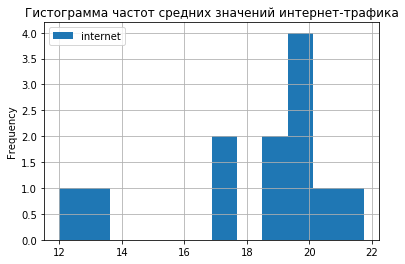

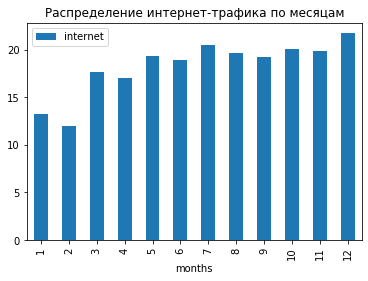

In [76]:
# создадим сводную таблицу средних значений интернет-трафика пользователей по месяцам
ultra_internet_months = data_users_ultra.pivot_table(index = 'months', values = 'internet')
display(ultra_internet_months)
ultra_internet_months.plot(kind='hist', bins = 12, grid=True, title='Гистограмма частот средних значений интернет-трафика')
ultra_internet_months.plot(y='internet', kind='bar', title='Распределение интернет-трафика по месяцам')
print(ultra_internet_months.describe(), '\n')
varience = np.var(ultra_internet_months['internet'])
print('Дисперсия:', varience, '\n')
standart_deviation = np.std(ultra_internet_months['internet'])
print('Стандартное отклонение:', standart_deviation)

<b>Вывод</b>

Значения среднего и медианы близкие (18.25 и 19.3 соответственно). Стандартное отклонение равно 2.79, а дисперсия - 7.82.

По гистограмме распределения частот видно, что чаще всего объем интернет-трафика на тарифе Ultra составляет примерно 19,5-20 Гб.

В соответствии с графиком объем интернет-трафика пользователей тарифа Ultra объем использованного интернета несколько меняется в течение года. Первые два месяца средний объем интернет-трафика составляет примерно 13 Гб, затем возрастает.

Минимальный объем интернет-трафика на тарифе Ultra: 0.0
Максимальное объем интернет-трафика на тарифе Ultra: 49.0


,user_id,months,minutes,messages,internet,tariff
50,1024,11,1146.0,0.0,43.0,ultra
51,1024,12,949.0,0.0,36.0,ultra
78,1050,7,209.0,52.0,35.0,ultra
97,1060,12,1233.0,52.0,43.0,ultra
211,1124,10,1225.0,121.0,49.0,ultra
...,...,...,...,...,...,...
973,1231,9,0.0,188.0,33.0,ultra
974,1231,10,0.0,185.0,31.0,ultra
976,1231,12,0.0,191.0,32.0,ultra
978,1328,11,0.0,8.0,35.0,ultra


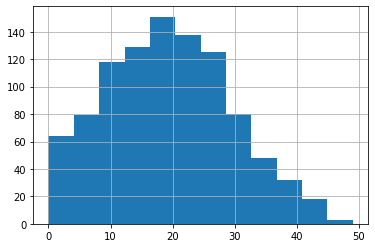

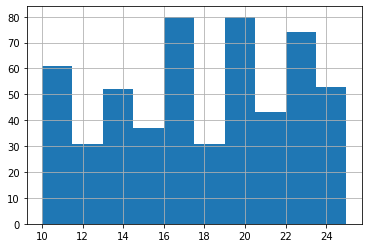

Процент превышений использованного трафика сверх 30 Гб: 0.13604060913705585


In [77]:
print('Минимальный объем интернет-трафика на тарифе Ultra:', data_users_ultra['internet'].min())
print('Максимальное объем интернет-трафика на тарифе Ultra:', data_users_ultra['internet'].max())
#найдем всех пользователей, которые использовали более 15Гб в месяц
display(data_users_ultra.query('internet > 30'))
data_users_ultra['internet'].hist(bins = 12)
plt.show()
data_users_ultra['internet'].hist(range=(10, 25))
plt.show()
print('Процент превышений использованного трафика сверх 30 Гб:', len(data_users_ultra.query('internet > 30')) / len(data_users_ultra))

<b>Вывод</b>

В 2018 году пользователи тарифа Ultra в среднем использовали примерно 18 Гб интернет-трафика в месяц. Вместе с тем, пользователи не часто выходили за рамки включенных в условия тарифа 30 Гб трафика (около 13 %). Были и те кто использовал в месяц больше (максимально - 49 Гб), чем включено в условия тарифа - 30 Гб. 87 % пользователей тарифа Ultra находятся в рамках тарифа. Соответственно выручка за Гб интернета сверх тарифа занимает минимальный процент в общей помесячной выручке с пользователей тарифа Ultra. 

In [78]:
display(data_income)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0


<b>Покажем вместе для сравнения:</b>

In [79]:
# создадим сводную таблицу
data_income.pivot_table(index = 'tariff_name', values = ['minutes', 'messages', 'internet', 'total_income'],
                        aggfunc = ['mean', 'std', 'var']).round(1)


mean                                    std                   \
            internet messages minutes total_income internet messages minutes   
tariff_name                                                                    
smart           16.3     33.4   417.9       1290.0      5.7     28.2   190.3   
ultra           19.5     49.4   526.6       2070.2      9.9     47.8   317.6   

                              var                                  
            total_income internet messages   minutes total_income  
tariff_name                                                        
smart              818.4     33.0    796.8   36219.3     669785.7  
ultra              376.2     97.1   2285.3  100873.6     141516.7

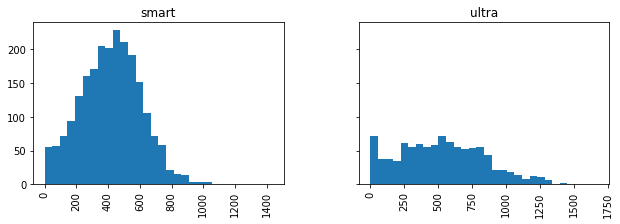

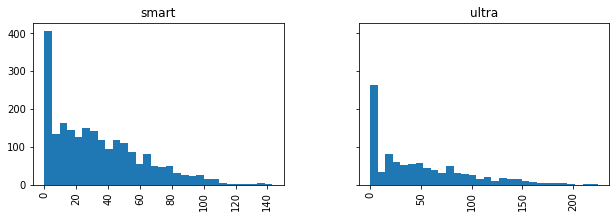

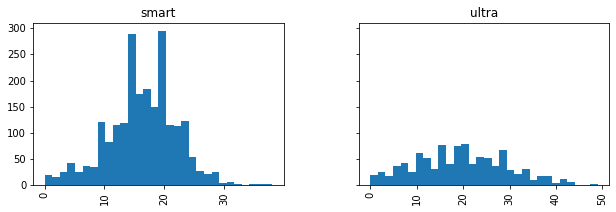

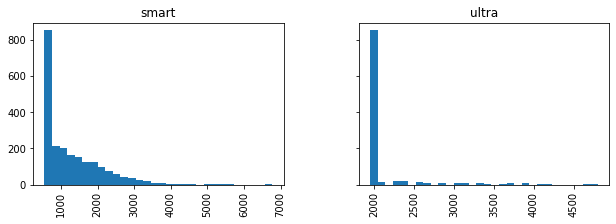

In [80]:
# гистограммы в цикле
for i in ['minutes', 'messages', 'internet', 'total_income']:
    data_income[[i, 'tariff_name']].hist( by = 'tariff_name', figsize = (10,3), bins = 30, sharey = True);

### 3.2 Проанализируем рост количества клиентов по обоим тарифам:

Text(0, 0.5, 'кол-во')

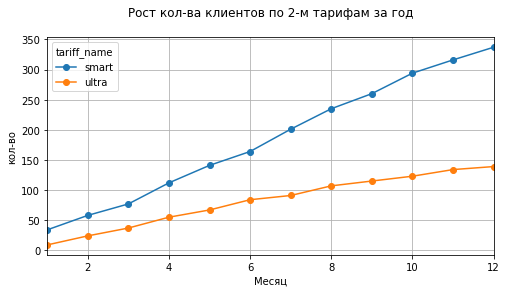

In [81]:
data_income.pivot_table(index='tariff_name', columns='months',
                        values='user_id', aggfunc='count').T.plot(kind='line', figsize=(8,4),  style = 'o-', grid=True)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во')

Из графика видно, что скорость роста количества пользователей тарифа Smart в сравнении с количеством пользователей тарифа Ultra выше и постоянно увеличивается. 

<b>Проанализируем среднюю ежемесячную выручку от одного абонента:</b>

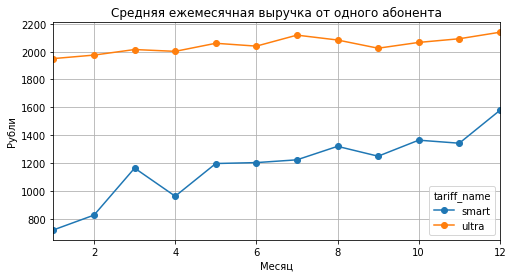

In [82]:
data_income.pivot_table(index='tariff_name', columns='months',
                        values='total_income', aggfunc='mean').T.plot(kind='line', figsize=(8,4),  style = 'o-', grid=True)
plt.title('Средняя ежемесячная выручка от одного абонента')
plt.xlabel('Месяц')
plt.ylabel('Рубли');

<b>Проанализируем суммарную ежемесячную выручку по 2-м тарифам:</b>

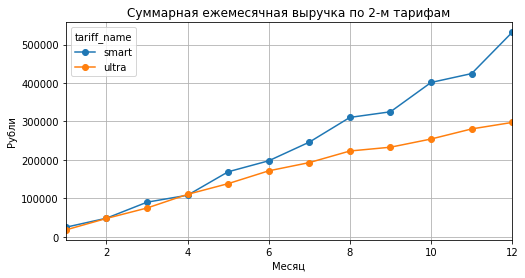

In [93]:
data_income.pivot_table(index='tariff_name', columns='months',
                        values='total_income', aggfunc='sum').T.plot(kind='line', figsize=(8,4),  style = 'o-', grid=True)

plt.title('Суммарная ежемесячная выручка по 2-м тарифам')
plt.xlabel('Месяц')
plt.ylabel('Рубли');

Выручка пользователей тарифа Smart к концу года уже почти в два раза выше выручки от Ultra, но есть опасность, что клиенты тарифа Smart могут уйти, как мы увидели ранее.¶

## 4 Проверка гипотез

Для проверки гипотез будет использоваться таблица 'data_income'

### Проверим гипотезу: средняя выручка пользователей тарифов Smart и Ultra различаются

In [84]:
display(data_income)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0


#### Разделим таблицу 'data_income' на две таблицы в соответствии с тарифами

In [85]:
# Пользователи с тарифом Smart
data_income_smart = data_income.query('tariff_name == "smart"')
display(data_income_smart)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
985,1001,11,430.0,0.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
986,1001,12,414.0,0.0,14.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
987,1002,6,117.0,4.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
988,1002,7,214.0,11.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
989,1002,8,289.0,13.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0


In [86]:
# Пользователи с тарифом Ultra
data_income_ultra = data_income.query('tariff_name == "ultra"')
display(data_income_ultra)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,8,0.0,17.0,13.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
981,1473,9,0.0,19.0,17.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
982,1473,10,0.0,20.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
983,1473,11,0.0,14.0,22.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


#### Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁

    Нулевая гипотеза будет звучать следующим образом:
Средняя выручка пользователей тарифов Smart и Ultra не различаются, т.е. средние двух выборок 'data_income_smart['total_income']' и 'data_income_ultra['total_income']' равны друг другу.
    
    Альтернативная гипотеза будет звучать следующим образом:
Средняя выручка пользователей тарифов Smart и Ultra различаются, т.е. средние двух выборок 'data_income_smart['total_income']' и 'data_income_ultra['total_income']' не равны друг другу.

Альтернативная гипотеза будет двухсторонней, т.к. среднее выручек пользователей разных тарифов может отличаться как в меньшую, так и в большую сторону.

#### Проверим гипотезу

In [87]:
alpha = .01 # выберем критический уровень статистической значимости равным 1%
results = st.ttest_ind(
    data_income_smart['total_income'], 
    data_income_ultra['total_income'], equal_var=False) # equal_var беру равным False, т.к. размер выборок не одинаков и у меня нет уверенности, что их дисперсии равны
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


<b>Вывод</b>

По результатам проведенного теста нулевая гипотеза о равенстве средней выручки пользователей тарифов Smart и Ultra отвергается. Т.е. вероятность (p-value) того, что средние выборок 'data_income_smart['total_income']' и 'data_income_ultra['total_income']' могут быть равны друг другу ничтожно мала (4,26 х 10 в -250 степени).
 
Таким образом, можно сделать вывод, что средняя выручка пользователей тарифа Smart отличается от средней выручки пользователей тарифа Ultra.

### Проверим гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### В таблицу 'data_income'  добавим еще один столбец с названиями регионов

In [88]:
# Общая таблица помесячной выручки всех пользователей
display(data_income)
display(data_users)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [89]:
# объединим таблицы 'data_income' и 'data_users_city' (берем из раздела Подготовка данных) с помощью .merge()
data_income_city = data_income.merge(data_users_city, on='user_id')
display(data_income_city)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income,city
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0,Санкт-Петербург
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0,Санкт-Петербург
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0,Санкт-Петербург
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0,Санкт-Петербург


#### Разделим таблицу 'data_income_city' на две таблицы ( в первой с пользователями из Москвы, во торой - пользователи из других регионов)

In [90]:
# Пользователи, проживающие в городе Москва
data_income_moscow = data_income_city.query('city == "Москва"')
display(data_income_moscow)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income,city
8,1003,8,380.0,37.0,9.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Москва
9,1003,9,961.0,91.0,13.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Москва
10,1003,10,855.0,83.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Москва
11,1003,11,824.0,94.0,12.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Москва
12,1003,12,802.0,75.0,10.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1490,8,346.0,50.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0,Москва
3170,1490,9,322.0,48.0,15.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0,Москва
3171,1490,10,312.0,45.0,21.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1200.0,1750.0,Москва
3172,1490,11,282.0,47.0,19.0,smart,50,15360,500,550,200,3,3,0.0,0.0,800.0,1350.0,Москва


In [91]:
# Пользователи, проживающие в других регионах, отличных от Москвы
data_income_regions = data_income_city.query('city != "Москва"')
display(data_income_regions)

,user_id,months,minutes,messages,internet,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_income,messages_income,internet_income,total_income,city
0,1000,5,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
1,1000,6,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
2,1000,7,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
3,1000,8,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
4,1000,9,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,17.0,11.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0,Санкт-Петербург
3210,1489,9,0.0,32.0,17.0,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0,Санкт-Петербург
3211,1489,10,0.0,21.0,20.0,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0,Санкт-Петербург
3212,1489,11,0.0,20.0,18.0,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0,Санкт-Петербург


#### Сформулируем нулевую гипотезу H₀ и альтернативную гипотезу H₁

    Нулевая гипотеза будет звучать следующим образом:
Средняя выручка пользователей, проживающих в Москве не отличается от средней выручки пользователей, проживающих в других регионах, отличных от Москвы, т.е. средние двух выборок 'data_income_moscow['total_income']' и 'data_income_regions['total_income']' равны друг другу.
    
    Альтернативная гипотеза будет звучать следующим образом:
Средняя выручка пользователей, проживающих в Москве отличается от средней выручки пользователей, проживающих в других регионах, отличных от Москвы, т.е. средние двух выборок 'data_income_smart['total_income']' и 'data_income_ultra['total_income']' не равны друг другу.

Альтернативная гипотеза будет двухсторонней, т.к. среднее выручек пользователей из Москвы и из других регионов может отличаться как в меньшую, так и в большую сторону.

#### Проверим гипотезу

In [92]:
alpha = .01 # выберем критический уровень статистической значимости равным 1%
results = st.ttest_ind(
    data_income_moscow['total_income'], 
    data_income_regions['total_income'], equal_var=False) # equal_var беру равным False, т.к. размер выборок не одинаков и у меня нет уверенности, что их дисперсии равны
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


p-value равное 0.52 означает с мы можем отклонить нулевую гипотезу с вероятностью ошибки 52 %. Различия в значениях средней выручки пользователей из Москвы и средней выручки пользователей из других регионов могут быть получены случайно с верояностью 52 %. Это очень большая вероятность (альфа 1 %), поэтому мы не можем сказать, что средние выручки значимо отличаются. Следовательно отвергнуть нулевую гипотезу, что средние выручки не оличаются не получится.

<b>Вывод</b>

По результатам проведенного теста нулевая гипотеза о равенстве средней выручки пользователей, проживающих в Москве и средней выручки пользователей, проживающих в других регионах, отличных от Москвы не отвергается. Т.е. вероятность (p-value) того, что средние выборок 'data_income_moscow['total_income']' и 'data_income_regions['total_income']' могут быть равны друг другу велика (примерно 52 %).
 
Таким образом, можно сделать вывод, что средняя выручка пользователей, проживающих в Москве не отличается от средней выручки пользователей, проживающих в других регионах, отличных от Москвы.

## Общий вывод


    В ходе работы выполнены следующие мероприятия и получили результаты:
- предварительно изучены данные;

- проведена предобработка и подготовка данных, включавшая: поиск и удаление по возможности пропусков и других аномалий; приведение данных в столбцах к необходимым типам данных;

- проведена подготовка пользовательских данных;
    - для каждого пользователя просчитаны количество сделанных звонков и израсходованных минут по месяцам, количество отправленных сообщений по месяцам и объем израсходованного интернет-трафика по месяцам.
    Объеденив все эти данные в одну таблицу, мы увидели у некоторых клиентов попадаются пустые значения в столбце с количеством отправленных сообщений, это может говорить о том, что данные клиенты не пользуются отправкой сообщений, а используют какие-либо месенджеры типа телеграмм или ватцап. 
    - посчитана общая помесячная выручка каждого клиента. Для этого была найдена выручка за минуты, сообщения и объем интернет-трафика, использованные сверх тарифов, а затем просуммирована вместе с ежемесячной абонентской платой за соответствующий тариф.

- проведен анализ данных (для этого всеклиенты поделены на 2 группы по используемому тарифу), в ходе которого:
    - исследованы изменения количества израсходованных минут, отправленных сообщений и использованных Гб трафика в течение года (в начале, середине и конце года) для каждого тарифа. Гистограммы распределения частот израсходованных минут и использованных Гб трафика в течение года для обоих тарифов имеют схожий характер. Гистограммы распределения частот сообщений для обоих тарифов тоже имеют схожий нисходящий характер, при этом чаще всего люди вообще не используют сообщения СМС, предпочитая видимо альтернативные месенджеры для отправки сообщений. Чаще всего количество использованных минут на тарифе Smart - примерно 390-410 минут, средне количество минут - 387 минут в месяц; количество сообщений (без учета 0)- примерно 33-34 сообщения, в среднем за месяц - примерно 32 сообщения; чаще всего количество Гб составляло примерно 16-16.5 Гб, средний объем интернет-трафика - 15 Гб в месяц. Чаще всего количество минут на тарифе Ultra - примерно 470-570 минут (к концу года увеличивается), средне количество минут - 495 минут в месяц; количество сообщений (без учета 0)- примерно 43 сообщения; чаще всего количество Гб составляло примерно 19,5-20 Гб, средний объем интернет-трафика - 18 Гб в месяц;
    - посчитаны среднее количество, дисперсия и стандартное отклонение для средних значений израсходованных минут, отправленных сообщений и объема интернет-трафика пользователями тарифов Smart и Ultra по месяцам, 
    - найдены максимальные средние значения выговоренных минут, отправленных сообщений и объема интернет-трафика;
    - построим диаграмму распределения израсходованных минут всех пользователей тарифов Smart и Ultra.

- проведены проверки двухсторонние и односторонняя гипотезы, в ходе которых выяснено:
    - средняя выручка пользователей, использующих тарифы Smart и Ultra отличается друг от друга;
    - средняя выручка пользователей, проживающих в Москве не отличается от средней выручки пользователей, проживающих в других регионах, отличных от Москвы.
    
    
<b>В результате проведенных исследований проведено сравнение 2-х разных тарифов Smart и Ultra. В течение года отмечен рост количества пользователей обоих тарифов в особенности тарифа Smart (более чем в 2 раза выше, чем у тарифа Ultra). Кроме того скорость прироста количества пользоватетлей Smart существенно выше Ultra.<b/>

<b>Не смотря на то, что средняя ежемесячная выручка от одного абонента Ultra значительно превышает среднюю ежемесячную выручку от одного абонента Smart, суммарная ежемесячная выручка по тарифу Smart практически на протяжении всего года выше суммарной ежемесячной выручки по тарифу Ultra. Разрыв растет в течение всего года в пользу тарифа Smart. Особенно это заметно в конце  года, когда выручка по тарифу Smart почти в два раза выше выручки от Ultra.<b/>

<b>Вместе с тем, существует риск ухода пользователей тарифа Smart к конкурентам (22 человека от Smart против 13 человек от Ultra за последние 4 месяца).<b/>

<b>Возможно следует дополнительно простимулировать пользователей тарифа Smart или предложить доплнительные условия.<b/>